In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

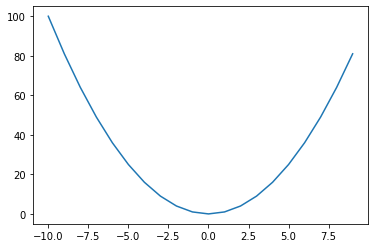

In [2]:
x=np.arange(-10,10,1)
f_x=x**2
plt.plot(x,f_x)
plt.show()

In [5]:
x_new=10
derivative=[]
y=[]
learning_rate=0.1

#gradient값을 추가해주는 loop
for i in range(100):
    old_value=x_new
    derivative.append(old_value-learning_rate*2*old_value)
    x_new=old_value-learning_rate*2*old_value
    y.append(x_new**2)

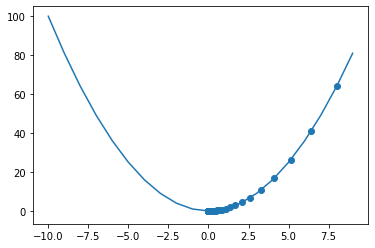

In [6]:
plt.plot(x,f_x)
plt.scatter(derivative,y)
plt.show()

In [7]:
def sin_function(x):
    return x*np.sin(x**2)+1
def derivative_f(x):
    return np.sin(x**2)+2*(x**2)*np.cos(x**2)

In [8]:
x=np.arange(-3,3,0.001)
f_x=sin_function(x)

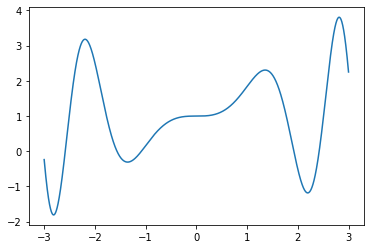

In [9]:
plt.plot(x,f_x)
plt.show()

In [10]:
derivative_f(3)

-15.988226228682427

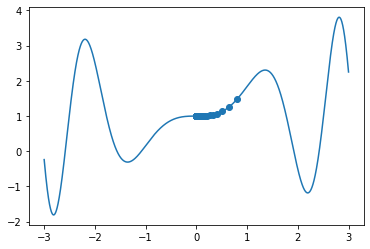

In [11]:
x_new=1
derivative=[]
y=[]
learning_rate=0.1

for i in range(1000):
    old_value=x_new
    x_new=old_value-learning_rate*2*old_value
    derivative.append(x_new)
    y.append(sin_function(x_new))
plt.plot(x,f_x)
plt.scatter(derivative, y)
plt.show()

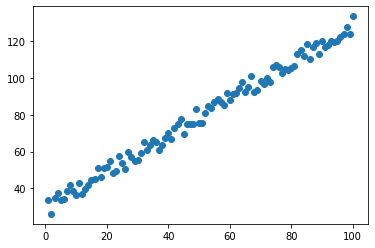

In [23]:
import random

def gen_data(numPoints, bias, variance):
    x=np.zeros(shape=(numPoints, 2))
    y=np.zeros(shape=numPoints)
               
    #선형식
    for i in range(0,numPoints):
        x[i][0]=1
        x[i][1]=i
        y[i]=(i+bias)+random.uniform(0,1)*variance
    return x, y
               
x,y=gen_data(100,25,10)
               
plt.plot(x[:,1]+1,y,"o")
plt.show()
            

In [24]:
df = pd.read_csv("slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [27]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

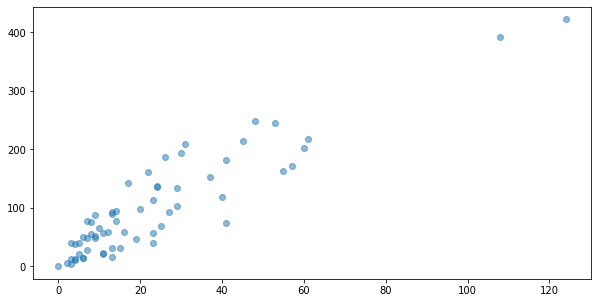

In [28]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y,'o',alpha=0.5)

In [35]:
X=np.concatenate((np.ones((len(raw_X),1)),raw_X),axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [36]:
w=np.random.normal((2,1))
w

array([2.92275572, 1.01543423])

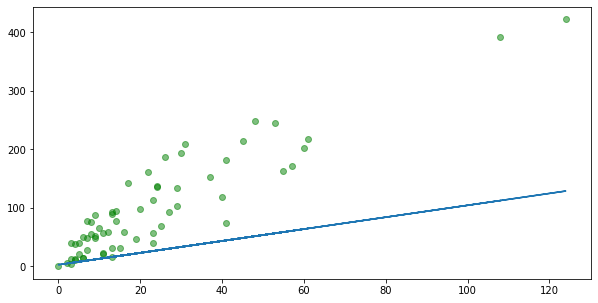

In [39]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"go",alpha=0.5)
plt.plot(raw_X,y_predict)

In [18]:
def gradient_descent_sub(x, y, w, theta, alpha, m, numIterations):
    xTrans=x.transpose()    
    theta_list = []
    cost_list = []

    for i in range(0, numIterations):
        hypothesis=np.dot(x,theta) #y추정값
        loss=hypothesis-y
        
        cost=np.sum(loss**2)/(2*m)
        gradient=np.dot(xTrans, loss)/m
        print(gradient.shape)

    return theta, theta_list, cost_list

In [30]:
def hypothesis_function(X, theta):
    return X.dot(theta)

def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()] #2by1
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations): #t0, t1을 사용해 iteration이 끝날 때 theta값 업데이트
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [40]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.88605861  3.41616476]
cost: 625.3739371171412


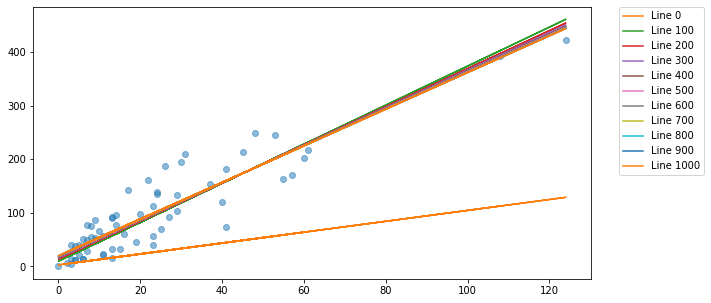

In [53]:
theta_list = np.array(theta_list)
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.T)

plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
#Multivariate Linear Regression
for _ in range(iterations):
    predictions=x.dot(theta)
    
    for n in range(theta.size):
        partial_marginal=x[:,n]
        errors_xi=(predictions-y)*partial_marginal
        theta[i]=theta[i]-alpha*(1/m)*errors_xi.sum()
        
    theta_history.append(theta)
    cost_history.append(compute_cost(x,y,theta))

In [65]:
def gradient_descent_update(x, y, w, theta, alpha, m, numIterations):
    xTrans=x.transpose()    
    theta_list = []
    cost_list = []

    for i in range(0, numIterations):
        hypothesis=np.dot(x,theta)
        loss=hypothesis-y
        
        cost=np.sum(loss**2)/(2*m)
        gradient=np.dot(xTrans, loss)/m
        print(gradient.shape)
        
        #update
        theta=theta-alpha*gradient
        if i%250==0:
            theta_list.append(theta)
            cost_list.append(cost)
        return theta, theta_list, cost_list
    
    m,n=np.shape(x)
    numIterations=5000
    alpha=0.0005
    theta=np.ones(n)